In [56]:
import pandas as pd
import matplotlib.pyplot as plt

crime_data = pd.read_csv('../Data/crime_data_updated.csv')

In [57]:
# Part 1) Temporal patterns
# Convert the 'Date' column to datetime format
crime_data['Date'] = pd.to_datetime(crime_data['Date'], errors='coerce')
# Create a new column 'Year' by extracting the year from the Date column
crime_data['Year'] = crime_data['Date'].dt.year

# Count crimes per year using groupby and size
crimes_per_year = crime_data.groupby('Year').size()
print(crimes_per_year)

Year
2003    142803
2004    142054
2005    137048
2006    131856
2007    131771
2008    135242
2009    134309
2010    127758
2011    126713
2012    135464
2013    147664
2014    144844
2015    151459
2016    145994
2017    149487
2018    143663
2019    138380
2020    112167
2021    121722
2022    127404
2023    125024
dtype: int64


In [58]:
# Get the year with the most crimes
year_most_crimes = crimes_per_year.idxmax()
max_crimes = crimes_per_year.max()

# Get the year with the fewest crimes
year_fewest_crimes = crimes_per_year.idxmin()
min_crimes = crimes_per_year.min()

print("Year with most recorded crimes:", year_most_crimes, "with", max_crimes, "crimes")
print("Year with fewest recorded crimes:", year_fewest_crimes, "with", min_crimes, "crimes")

Year with most recorded crimes: 2015 with 151459 crimes
Year with fewest recorded crimes: 2020 with 112167 crimes


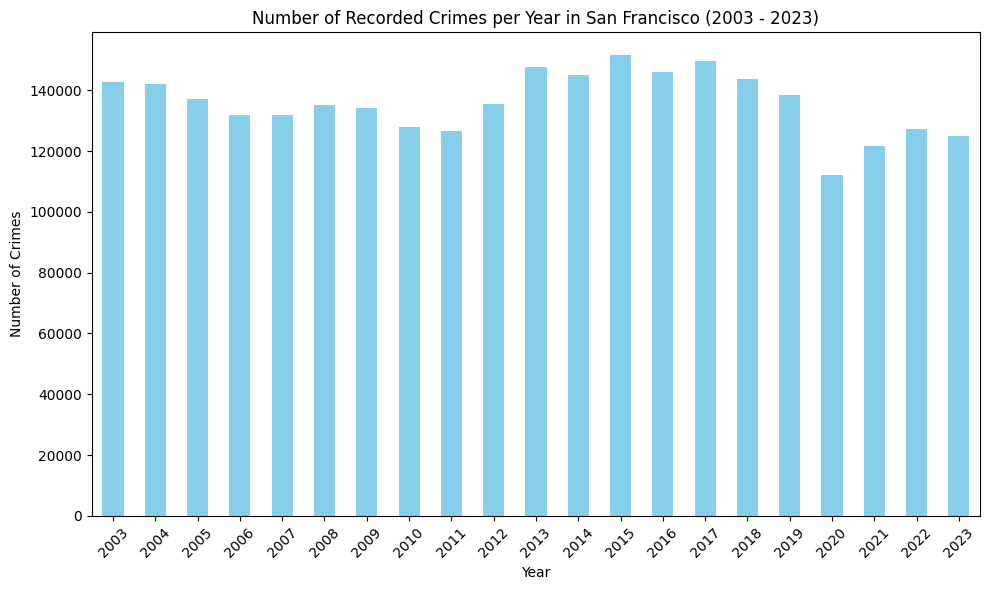

In [59]:
# Sort the crimes per year from lowest to highest
crimes_per_year_sorted = crimes_per_year.sort_index()

# Plot bar plot of crimes per year
plt.figure(figsize=(10, 6))
crimes_per_year_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Recorded Crimes per Year in San Francisco (2003 - 2023)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

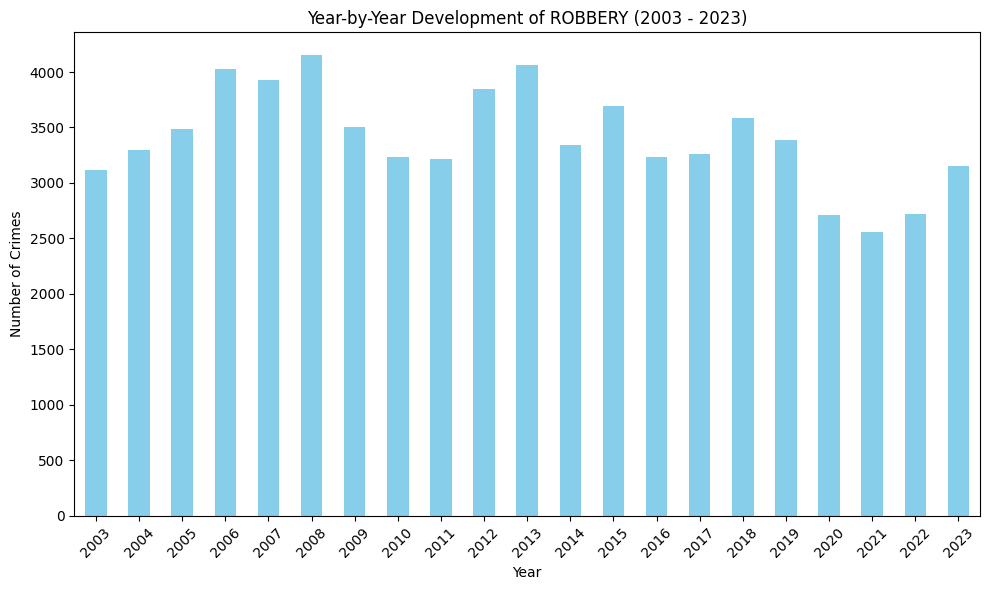

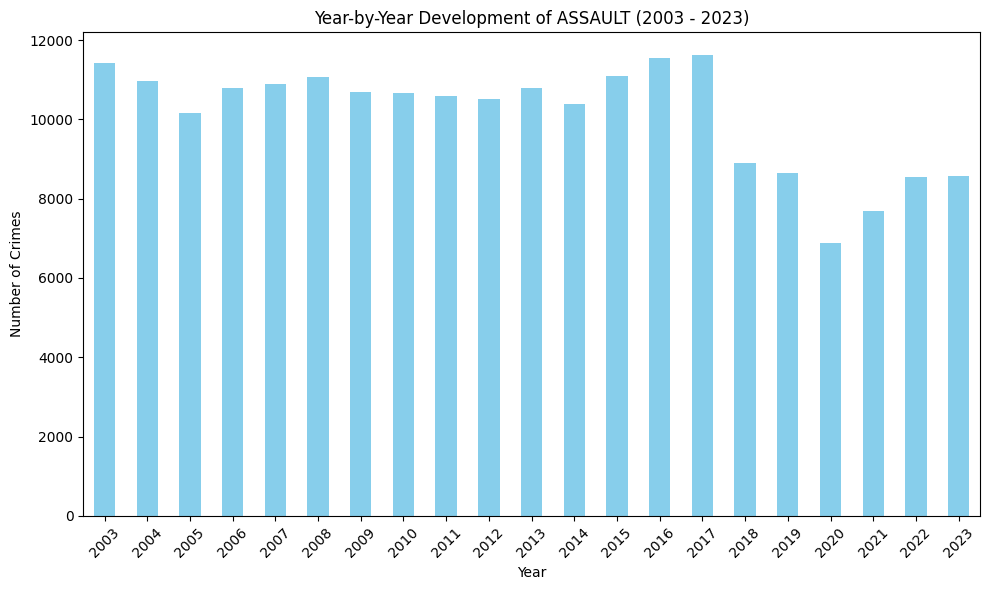

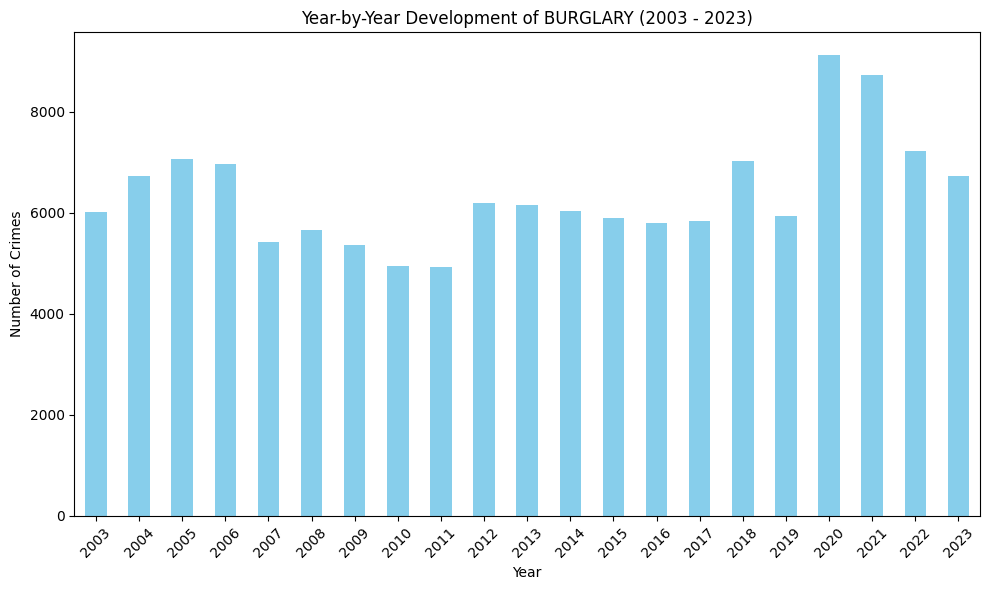

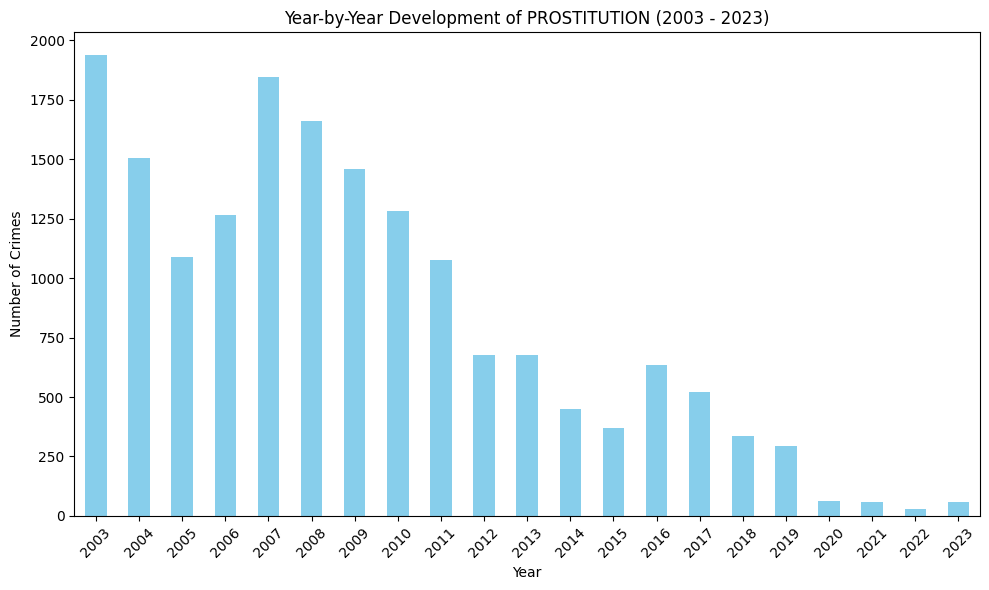

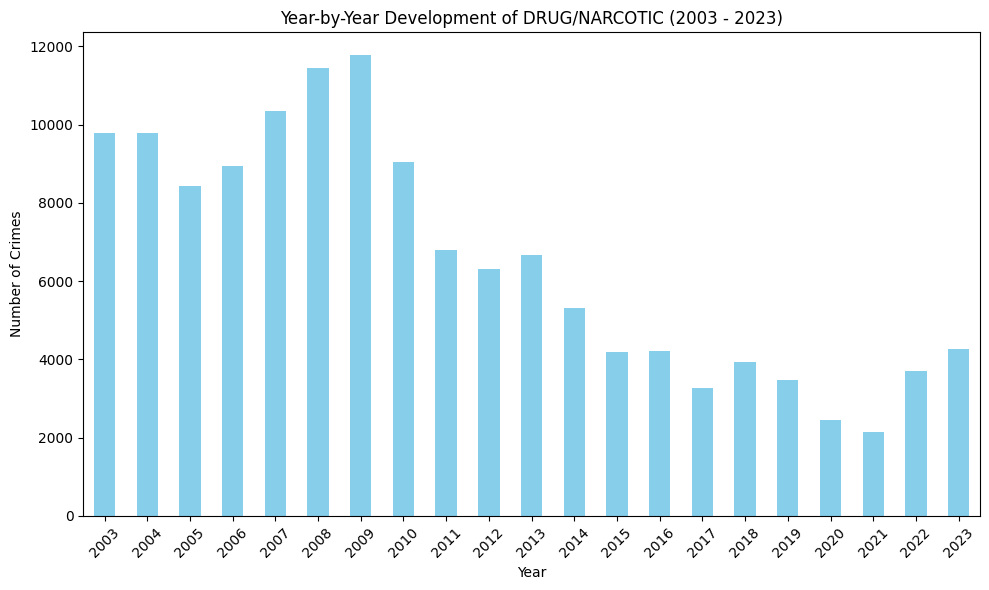

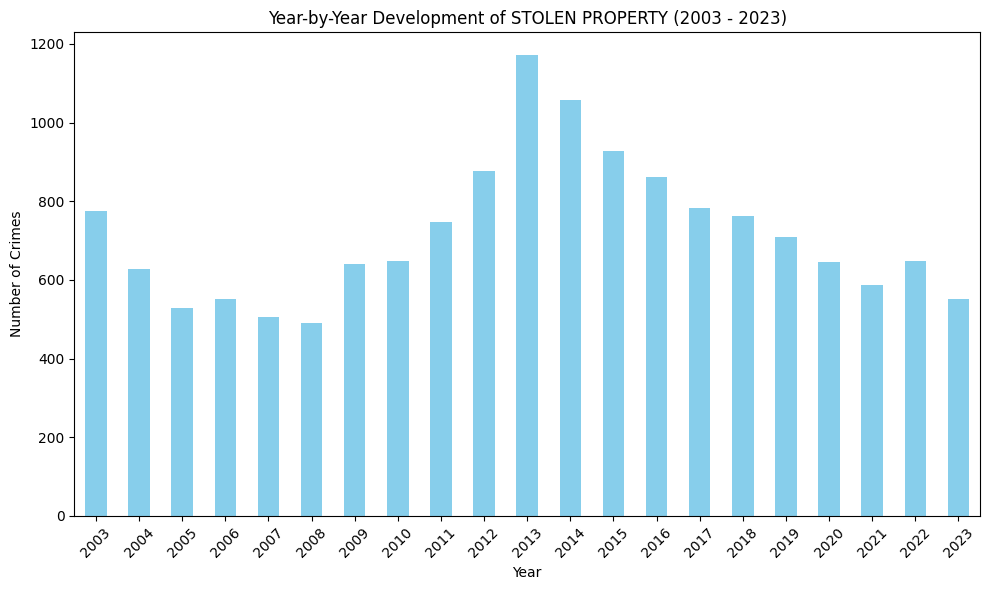

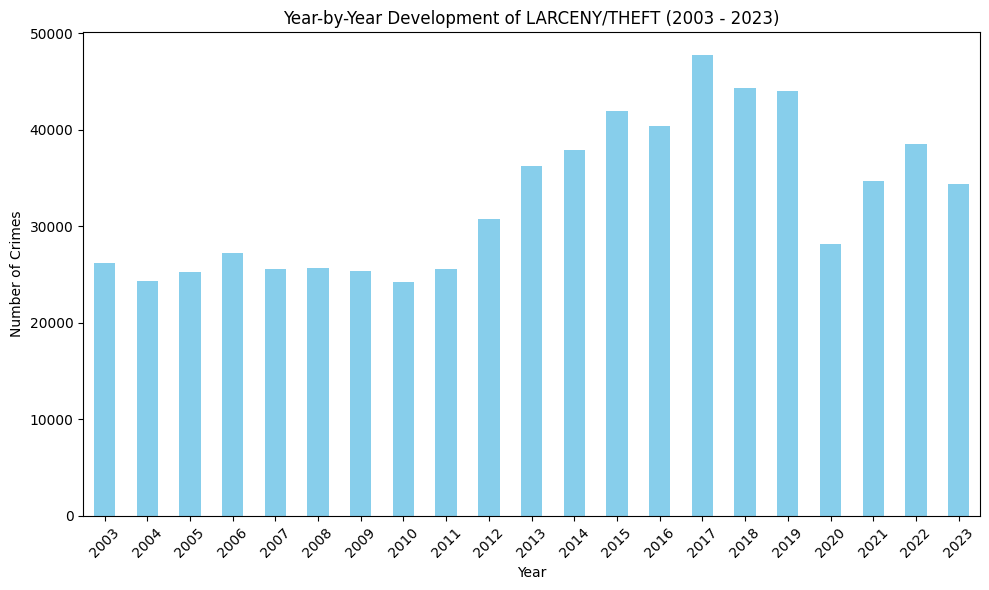

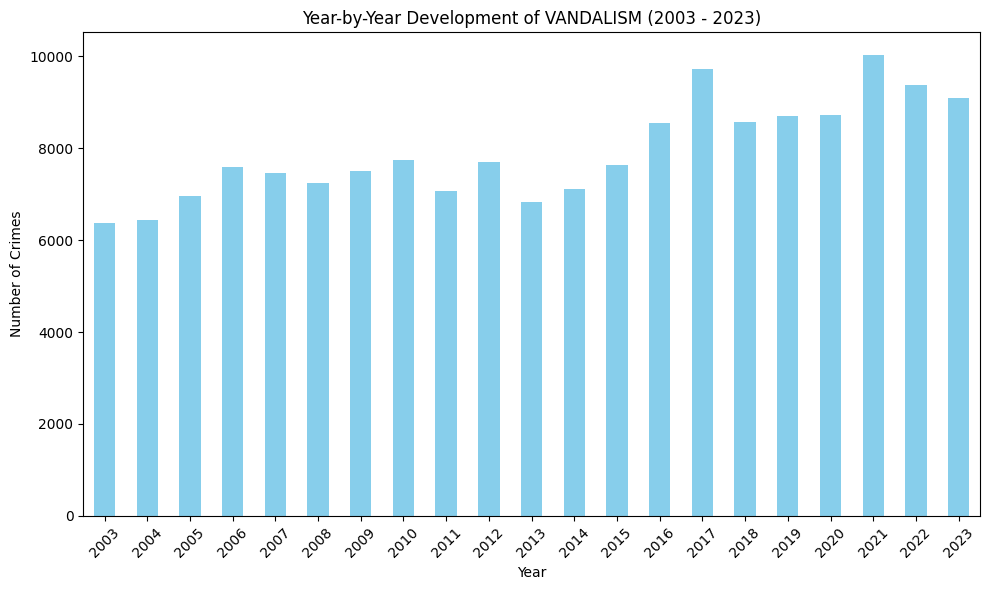

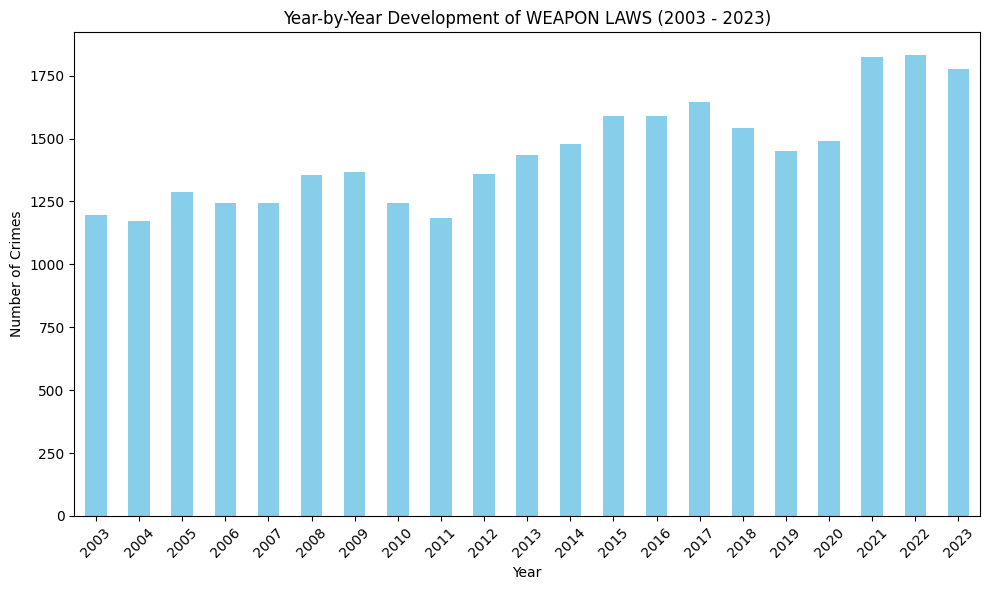

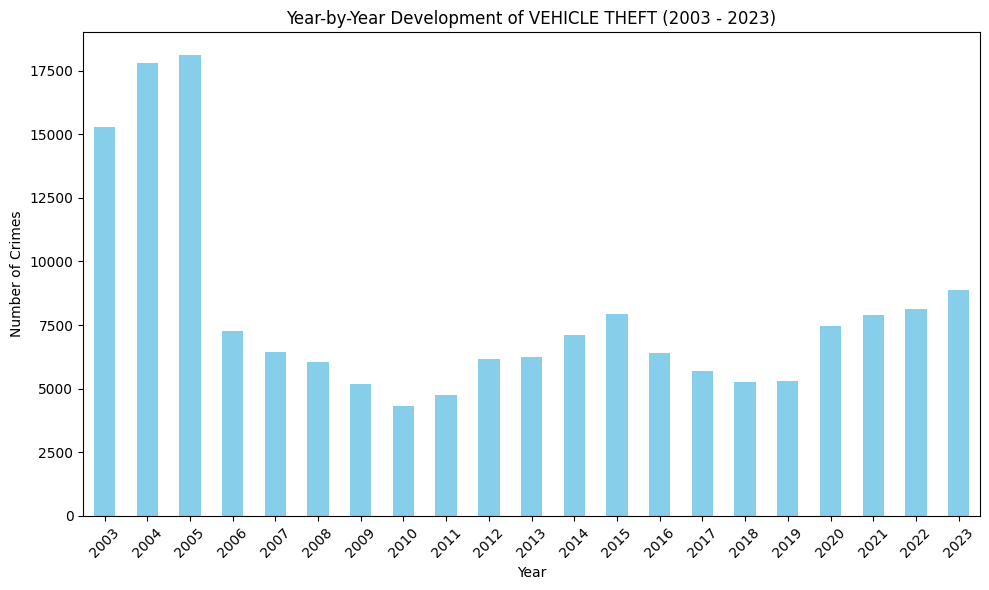

In [ ]:
# Now to plot the focus crimes bar plots

# Define the focus crime categories
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

# Loop over each focus crime category
for crime in focuscrimes:
    # Filter for the current crime category
    crime_subset = crime_data[crime_data['Category'] == crime]
    
    # Count the number of crimes per year
    crimes_per_year = crime_subset['Year'].value_counts().sort_index()
    
    # To ensure that every year is represented even though the count is 0, we add missing years with 0 crimes
    all_years = pd.Series(0, index=range(2003, 2024))
    crimes_per_year = all_years.add(crimes_per_year, fill_value=0).astype(int)
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    crimes_per_year.plot(kind='bar', color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.title(f'Year-by-Year Development of {crime} (2003 - 2023)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()